## Problem Statement
### Predicting the “Driving Style”
#### Problem Description

Road safety rules and regulations are designed to prevent the citizens from fatal incidents. Although policies are in place, we observe negligent behaviour of the drivers which lead to serious injuries or death crashes. It is of utmost interest of the authorities to understand and analyse human behaviour to take necessary corrective and preventive actions.  

The stakeholders are the citizens, road transport authorities, Insurers and Researchers/Data service providers. In order to design a driving assistance system there is a need to get an understanding of the data on the driving patterns and broadly distinguish bad drivers from good ones. This in turn will benefit Insurers in analysing underwriting risks, prevent frauds and designing No-claim-discount systems (NCD systems), etc. Additionally,  the concerned authorities will need insights to design benchmarks for qualifications and driver licensing regulations, etc. 

#### From the given data we need to find out the Driving Style of the particular Driver Whether it is "Agressive", "Normal" or "Vague


------------------------------------------------------------------------------------------------------------------



####  Importing Necessary libraries 

In [1]:
# Importing Necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
%matplotlib inline

#### For getting the output of plot just after cell

In [2]:
init_notebook_mode(connected=True)

### Reading the csv files

In [3]:
train_data = pd.read_csv('Train.csv')

In [4]:
train_data.head()

ID    V2     V5  V6  DrivingStyle
0  DR_24526  1265  10243   2             2
1  DR_30052  1680  30871   6             2
2  DR_40928   936   3224   4             2
3  DR_66033  1503   3315   4             2
4  DR_45266   929   3022   4             2

In [5]:
train_vehicletravelling_data = pd.read_csv('Train_Vehicletravellingdata.csv')

In [6]:
train_weather_data =pd.read_csv('Train_WeatherData.csv')

In [7]:
train_vehicletravelling_data.head(4)

ID                   V1  V3  V4     V7  V8     V9   V10    V11  V18
0  DR_24526  2012-03-21 09:14:55   1  81  57227  87  16986   941   94.0  Dry
1  DR_24526  2012-03-21 09:15:07   1  88  57229  81   1708   551   11.0  Dry
2  DR_24526  2012-03-21 09:15:12   1  88  57230  88  22892  1698    4.0  Dry
3  DR_24526  2012-03-21 09:15:48   2  84  57228  89   1945   544  127.0  Dry

### Renaming the columns as per Attribute Description

In [8]:
train_data.columns = ['ID','Vehicle_len','Vehicle_Wt','Num_Axle','DrivingStyle']

In [9]:
train_vehicletravelling_data.columns = ['ID','date_time_trip','road_lane','vehicle_speed','pre_vehicle_ID','pre_vehicle_speed','pre_vehicle_wt','pre_vehicle_len','time_gap_pre_vehicle','road_condition']

In [10]:
train_vehicletravelling_data.head(4)

ID       date_time_trip  road_lane  vehicle_speed  pre_vehicle_ID  \
0  DR_24526  2012-03-21 09:14:55          1             81           57227   
1  DR_24526  2012-03-21 09:15:07          1             88           57229   
2  DR_24526  2012-03-21 09:15:12          1             88           57230   
3  DR_24526  2012-03-21 09:15:48          2             84           57228   

   pre_vehicle_speed  pre_vehicle_wt  pre_vehicle_len  time_gap_pre_vehicle  \
0                 87           16986              941                  94.0   
1                 81            1708              551                  11.0   
2                 88           22892             1698                   4.0   
3                 89            1945              544                 127.0   

  road_condition  
0            Dry  
1            Dry  
2            Dry  
3            Dry

In [11]:
train_weather_data.dtypes

ID      object
V1      object
V12    float64
V13     object
V14     object
V15    float64
V16    float64
V17    float64
V19     object
dtype: object

In [12]:
train_weather_data.columns = ['ID','date_time_trip','air_temp','precipitation_type','precipitation_intensity','rel_humidity','wind_direction','wind_speed','lighting_condition']

In [13]:
train_data.head(4)

ID  Vehicle_len  Vehicle_Wt  Num_Axle  DrivingStyle
0  DR_24526         1265       10243         2             2
1  DR_30052         1680       30871         6             2
2  DR_40928          936        3224         4             2
3  DR_66033         1503        3315         4             2

In [14]:
print(train_data.count())
print(train_weather_data.count())
print(train_vehicletravelling_data.count())

ID              12994
Vehicle_len     12994
Vehicle_Wt      12994
Num_Axle        12994
DrivingStyle    12994
dtype: int64
ID                         162566
date_time_trip             162566
air_temp                   160509
precipitation_type         162566
precipitation_intensity    162566
rel_humidity               160461
wind_direction             160452
wind_speed                 160102
lighting_condition         162566
dtype: int64
ID                      162566
date_time_trip          162566
road_lane               162566
vehicle_speed           162566
pre_vehicle_ID          162566
pre_vehicle_speed       162566
pre_vehicle_wt          162566
pre_vehicle_len         162566
time_gap_pre_vehicle    160111
road_condition          162566
dtype: int64


In [15]:
train_vehicletravelling_data.head(4)

ID       date_time_trip  road_lane  vehicle_speed  pre_vehicle_ID  \
0  DR_24526  2012-03-21 09:14:55          1             81           57227   
1  DR_24526  2012-03-21 09:15:07          1             88           57229   
2  DR_24526  2012-03-21 09:15:12          1             88           57230   
3  DR_24526  2012-03-21 09:15:48          2             84           57228   

   pre_vehicle_speed  pre_vehicle_wt  pre_vehicle_len  time_gap_pre_vehicle  \
0                 87           16986              941                  94.0   
1                 81            1708              551                  11.0   
2                 88           22892             1698                   4.0   
3                 89            1945              544                 127.0   

  road_condition  
0            Dry  
1            Dry  
2            Dry  
3            Dry

In [16]:
train_weather_data.head(4)

ID       date_time_trip  air_temp precipitation_type  \
0  DR_24526  2012-03-21 09:14:55       7.0              clear   
1  DR_24526  2012-03-21 09:15:07       7.0              clear   
2  DR_24526  2012-03-21 09:15:12       7.0              clear   
3  DR_24526  2012-03-21 09:15:48       7.0              clear   

  precipitation_intensity  rel_humidity  wind_direction  wind_speed  \
0                    None          95.0           146.0         1.0   
1                    None          95.0           124.0         0.0   
2                    None          95.0           124.0         0.0   
3                    None          95.0           124.0         0.0   

  lighting_condition  
0           daylight  
1           daylight  
2           daylight  
3           daylight

#### Observed from the csv that the ID and date_time_trip column, in the 'Weater data' and 'Vehicle Travelling data', are same So merging both the file On ID and date_time_trip column

In [17]:
train_vehicletravelling_weather = pd.merge(train_vehicletravelling_data, train_weather_data, how='inner', on=['ID','date_time_trip'])

In [18]:
train_vehicletravelling_weather.columns

Index(['ID', 'date_time_trip', 'road_lane', 'vehicle_speed', 'pre_vehicle_ID',
       'pre_vehicle_speed', 'pre_vehicle_wt', 'pre_vehicle_len',
       'time_gap_pre_vehicle', 'road_condition', 'air_temp',
       'precipitation_type', 'precipitation_intensity', 'rel_humidity',
       'wind_direction', 'wind_speed', 'lighting_condition'],
      dtype='object')

#### Merging the new dataframe train_vehicletravelling_weather with the train_data ON ID column

In [19]:
train = pd.merge(train_vehicletravelling_weather,train_data, how='outer', on=['ID'])

In [20]:
train.columns

Index(['ID', 'date_time_trip', 'road_lane', 'vehicle_speed', 'pre_vehicle_ID',
       'pre_vehicle_speed', 'pre_vehicle_wt', 'pre_vehicle_len',
       'time_gap_pre_vehicle', 'road_condition', 'air_temp',
       'precipitation_type', 'precipitation_intensity', 'rel_humidity',
       'wind_direction', 'wind_speed', 'lighting_condition', 'Vehicle_len',
       'Vehicle_Wt', 'Num_Axle', 'DrivingStyle'],
      dtype='object')

In [21]:
train.shape

(162566, 21)

In [22]:
train_driving_style = train.DrivingStyle.replace({1: 'Aggressive', 2: 'Normal', 3: 'Vague'})

### Exploratory Data Analysis

#### Checking for Null Values

In [23]:
train.isnull().sum()

ID                            0
date_time_trip                0
road_lane                     0
vehicle_speed                 0
pre_vehicle_ID                0
pre_vehicle_speed             0
pre_vehicle_wt                0
pre_vehicle_len               0
time_gap_pre_vehicle       2455
road_condition                0
air_temp                   2057
precipitation_type            0
precipitation_intensity       0
rel_humidity               2105
wind_direction             2114
wind_speed                 2464
lighting_condition            0
Vehicle_len                   0
Vehicle_Wt                    0
Num_Axle                      0
DrivingStyle                  0
dtype: int64

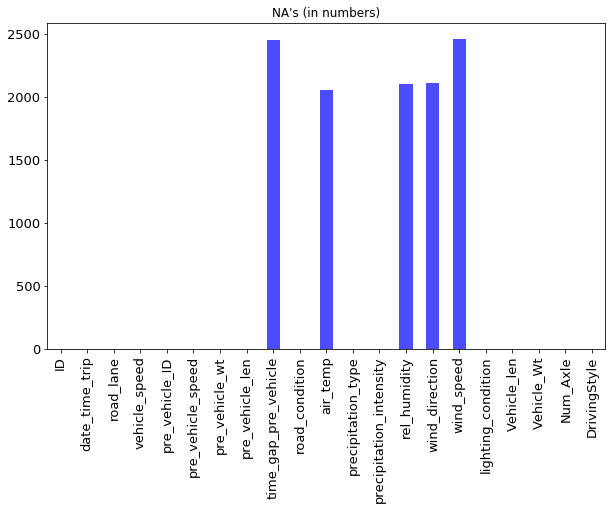

In [24]:
plt.figure(figsize=(10,10))
train.isnull().sum().plot(kind='bar',
                                  figsize=(10,6),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title("NA's (in numbers)")
plt.show()

### Correlation Between Variables

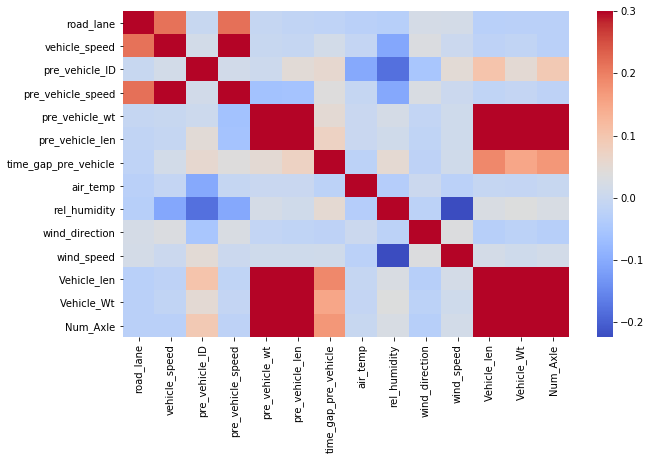

In [25]:
target = train["DrivingStyle"]
train_without_target = train.drop(["DrivingStyle"],axis=1)
corr = train_without_target.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr,cmap='coolwarm',vmax=.3)

### Observation:
1. preceeding vehicle length and preceeding vehicle weight are highly correlated
2. vehicle length and vehicle weight and Number of Axles are positively correlated
3. Wind Speed and Relative Humidity Negatively Correlated
4. Road Lane and Vehicle Speed are correlated
5. Road Lane and Preceeding Vehicle speed is correlated
6. Vehicle Length and time gap between preceeding vehicle positively correlated

### Printing unique values for each column
##### If the unique value are less that 10 in a column assigning it as categorical variable else numerical variable

In [26]:
cat_cols =[]
num_cols =[]
for i in train_without_target.columns:
    if len(np.unique(train[i])) < 10:
        cat_cols.append(i)
        print("{} : {} : {} ".format(i,len(np.unique(train[i])),np.unique(train[i])))
    else:
        num_cols.append(i)


road_lane : 2 : [1 2] 
road_condition : 4 : ['Dry' 'Snow covered' 'Visible tracks' 'Wet'] 
precipitation_type : 3 : ['clear' 'rain' 'snow'] 
precipitation_intensity : 5 : [' ' 'High' 'Low' 'Moderate' 'None'] 
lighting_condition : 3 : ['daylight' 'night' 'twilight'] 
Num_Axle : 8 : [2 3 4 5 6 7 8 9] 


### Convert Categorical variables to category

In [27]:
for i in cat_cols:
    train[i] = train[i].astype('category')

In [28]:

train.dtypes

ID                           object
date_time_trip               object
road_lane                  category
vehicle_speed                 int64
pre_vehicle_ID                int64
pre_vehicle_speed             int64
pre_vehicle_wt                int64
pre_vehicle_len               int64
time_gap_pre_vehicle        float64
road_condition             category
air_temp                    float64
precipitation_type         category
precipitation_intensity    category
rel_humidity                float64
wind_direction              float64
wind_speed                  float64
lighting_condition         category
Vehicle_len                   int64
Vehicle_Wt                    int64
Num_Axle                   category
DrivingStyle                  int64
dtype: object

In [29]:
# for i in train.columns:
#     print ("Number of unique values in {} column are {} \n The unique values are {}".format(i, len(train[i].unique()),train[i].unique()))
#     print ("---------------------- \n")

####  Analysing Target Varible (Driving Style)

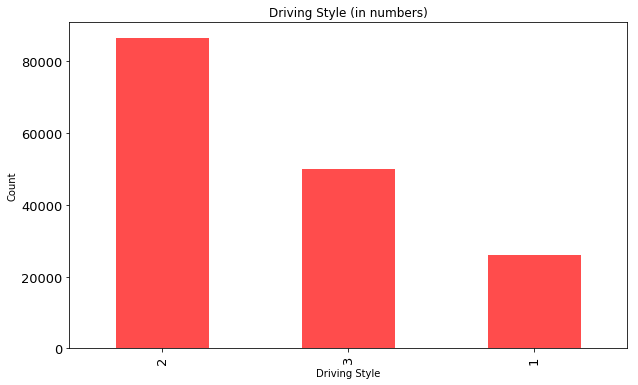

In [30]:
# plt.figure(figsize=(10,10)
train.DrivingStyle.value_counts().plot(kind='bar',
                                 figsize=(10,6),
                                  color="red",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Driving Style (in numbers)')
plt.xlabel('Driving Style')
plt.ylabel('Count')
plt.show()

#### Plotting Bar Graph For Categorical Variables

In [31]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
#         range=[0,100],
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', 
            size=14,
            color='black'
            )
        ),
        font = dict(
            family='Courier New, monospace',
            color = "white",
            size = 12
                )  
        )
    return layout_bar

In [32]:
def plot_bar(col_name):
    # create a table with value counts
    temp = train[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
            textposition = 'auto', 
        marker = dict(color = '#0047AB'),)] 
     
    layout_bar = generate_layout_bar(col_name=col_name)
    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

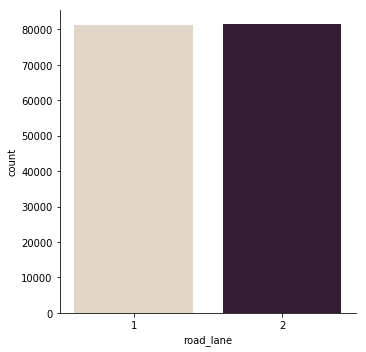

In [33]:
sns.catplot(x="road_lane", kind="count", palette="ch:.25", data=train);
    
    


### Observation:
Two lanes on the road and the traffic is equal on both the lanes

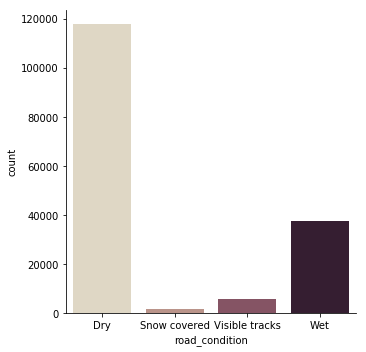

In [34]:
sns.catplot(x="road_condition", kind="count", palette="ch:.30", data=train);

### Observation :
Road Condition has four labels Dry, Wet, Snow Covered and Visible Tracks 

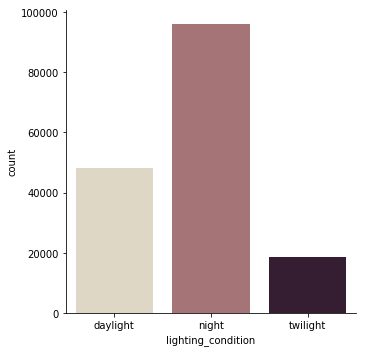

In [35]:
sns.catplot(x="lighting_condition", kind="count", palette="ch:.30", data=train);

In [36]:
plot_bar('precipitation_type')

### Observation : 
Most of the time 93%  weather is clear according to the data


In [37]:
plot_bar('precipitation_intensity')

### Observation :
1. There is a blank category
2. 93.24% of the precipitation_intensity column has None value as from the precipitation type cloumn we see most of the time the weather is clear 

In [38]:
#Replacing the blank category to a new Category
train.precipitation_intensity = train.precipitation_intensity.replace(to_replace=' ', value='NotKnown')

In [39]:
 plot_bar('lighting_condition')
    

### Observation :
Lighting Condition is mostly Night time i.e. the data that is collected is mostly during Night Time

In [40]:
plot_bar('Num_Axle')
   

### Observation :
Most of the vehicles have 2 axles 

## Visualization for continuous variable 

In [41]:
def plotHistogramGraph(col_name):
    data = [go.Histogram(x=train[col_name],
       marker=dict(
        color='#CC0E1D',   
    ))]
    layout = go.Layout(title = "Histogram of {}".format(col_name))
    fig = go.Figure(data= data, layout=layout)
    iplot(fig)

In [42]:
plotHistogramGraph('vehicle_speed')

### Observation:
Mostly vehicle speed is between 70 to 100 

In [43]:
plotHistogramGraph('wind_direction')

### Observation:
The Wind direction is mostly between 160 to 190 degrees

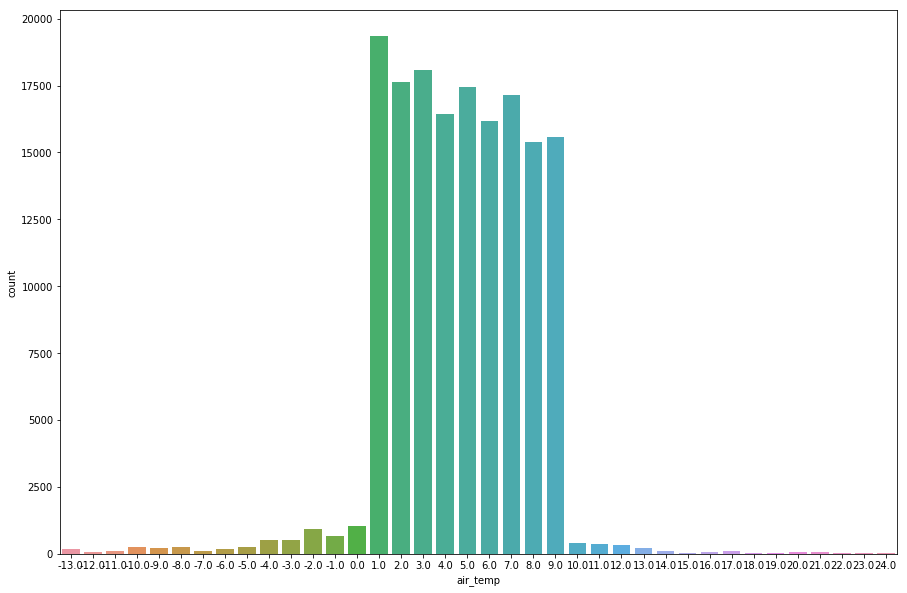

In [44]:
train.air_temp.sample(frac =0.1)
plt.figure(figsize=(15,10))
sns.countplot(x='air_temp', data=train)

### Observation :
  The Min temp is -13 degree and Max is 24 degree. which may mean that the data set belongs to colder region

In [45]:
DrivingStyle_dict = {1:'1',
           2:'2',
           3:'3',
           }
train = train.replace({"DrivingStyle":DrivingStyle_dict })

## Relation between vehicle speed and lighting Condition

In [46]:
driving_air_temp = train.groupby(['DrivingStyle','air_temp']).size().to_frame()
driving_air_temp = driving_air_temp.reset_index()
driving_air_temp.columns = ['DrivingStyle','air_temp','Count']


In [47]:
np.random.seed(123)
driving_air_temp.sample(frac =0.1)

DrivingStyle  air_temp  Count
8             1      -5.0     24
70            3     -11.0     37
82            3       1.0   5991
28            1      15.0     18
63            2      20.0     61
0             1     -13.0      8
5             1      -8.0     14
50            2       7.0   9361
81            3       0.0    325
4             1      -9.0     27

In [48]:
trace1 = go.Bar(x = driving_air_temp.air_temp[driving_air_temp.DrivingStyle=='1'],
               y = driving_air_temp.Count[driving_air_temp.DrivingStyle=='1'],
                text = driving_air_temp.Count[driving_air_temp.DrivingStyle=='1'],
                textposition = 'auto',
               name = 'Aggressive')
trace2 = go.Bar(x = driving_air_temp.air_temp[driving_air_temp.DrivingStyle=='2'],
               y = driving_air_temp.Count[driving_air_temp.DrivingStyle=='2'],
                text = driving_air_temp.Count[driving_air_temp.DrivingStyle=='2'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = driving_air_temp.air_temp[driving_air_temp.DrivingStyle=='3'],
               y = driving_air_temp.Count[driving_air_temp.DrivingStyle=='3'],
                text = driving_air_temp.Count[driving_air_temp.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Air Temperature and Driving Style',
                  xaxis =  dict(title = 'Air Temperature'),
                   yaxis =  dict(title = 'Counts',range=[0, driving_air_temp.Count+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [49]:
# train.precipitation_type
driving_prec_veh = train.groupby(['DrivingStyle','precipitation_type']).size().to_frame()
driving_prec_veh = driving_prec_veh.reset_index()
driving_prec_veh.columns = ['DrivingStyle','precipitation_type','Count']


In [50]:
trace1 = go.Bar(x = driving_prec_veh.precipitation_type[driving_prec_veh.DrivingStyle=='1'],
               y = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='1'],
                text = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='1'],
                textposition = 'auto',
               name = 'Aggressive')
trace2 = go.Bar(x = driving_prec_veh.precipitation_type[driving_prec_veh.DrivingStyle=='2'],
               y = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='2'],
                text = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = driving_prec_veh.precipitation_type[driving_prec_veh.DrivingStyle=='3'],
               y = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='3'],
                text = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Driving Style with Precipitation Type',
                  xaxis =  dict(title = 'Precipitation Type'),
                   yaxis =  dict(title = 'Counts',range=[0, driving_prec_veh.Count.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Observation:
Drivers drive aggressively inspite of rain and snow

In [51]:
Driving_Road_Condition = train.groupby(['DrivingStyle','road_condition']).size().to_frame()
Driving_Road_Condition = Driving_Road_Condition.reset_index()
Driving_Road_Condition.columns = ['DrivingStyle','road_condition','Count']


In [52]:
trace1 = go.Bar(x = Driving_Road_Condition.road_condition[Driving_Road_Condition.DrivingStyle=='1'],
           y = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='1'],
            text = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='1'],
            textposition = 'auto',
           name = 'Aggresive')
trace2 = go.Bar(x = Driving_Road_Condition.road_condition[Driving_Road_Condition.DrivingStyle=='2'],
               y = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='2'],
                text = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='2'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = Driving_Road_Condition.road_condition[Driving_Road_Condition.DrivingStyle=='3'],
               y = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='3'],
                text = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Driving Style with Road Condition',
                  xaxis =  dict(title = 'Road Condition'),
                   yaxis =  dict(title = 'Counts',range=[0, Driving_Road_Condition.Count.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Observation 
Most of the Drivers drive Normal way But there are few people who Inspite of Wet and Snow on the Roads Drive Aggressively

In [53]:
Driving_Lighting_Condition = train.groupby(['DrivingStyle','lighting_condition']).size().to_frame()
Driving_Lighting_Condition = Driving_Lighting_Condition.reset_index()
Driving_Lighting_Condition.columns = ['DrivingStyle','lighting_condition','Count']


In [54]:
trace1 = go.Bar(x = Driving_Lighting_Condition.lighting_condition[Driving_Lighting_Condition.DrivingStyle=='1'],
           y = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='1'],
            text = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='1'],
            textposition = 'auto',
           name = 'Aggresive')
trace2 = go.Bar(x = Driving_Lighting_Condition.lighting_condition[Driving_Lighting_Condition.DrivingStyle=='2'],
               y = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='2'],
                text = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='2'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = Driving_Lighting_Condition.lighting_condition[Driving_Lighting_Condition.DrivingStyle=='3'],
               y = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='3'],
                text = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Driving Style with Lighting Condition',
                  xaxis =  dict(title = 'Lighting Condition'),
                   yaxis =  dict(title = 'Counts',range=[0, Driving_Lighting_Condition.Count.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Observation :
At Night Time Number of people driving Aggressive are more compared to other Time of the day and also 
at Night people drive more Vaguely

### Manipulating Date Column

In [55]:
date =[]
time = []
for i in train.date_time_trip:
    a = str(i).split()
    date.append(str(a[0]))
    time.append(str(a[1]))


In [56]:
train['date']=date
train['time']=time

In [57]:
train['time'].head()

0    09:14:55
1    09:15:07
2    09:15:12
3    09:15:48
4    09:15:54
Name: time, dtype: object

In [58]:
day = []
month = []
year = []
hour = []
for i in train.date:
    a = str(i).split('-')
    year.append(str(a[0]))
    month.append(str(a[1]))
    day.append(str(a[2]))
    
for i in train.time:
    a = str(i).split(':')
    hour.append(str(a[0]))
    

In [59]:
train['day'] = day
train['month'] = month
train['year'] = year
train['hour'] = hour

In [60]:
train.head(5)

ID       date_time_trip road_lane  vehicle_speed  pre_vehicle_ID  \
0  DR_24526  2012-03-21 09:14:55         1             81           57227   
1  DR_24526  2012-03-21 09:15:07         1             88           57229   
2  DR_24526  2012-03-21 09:15:12         1             88           57230   
3  DR_24526  2012-03-21 09:15:48         2             84           57228   
4  DR_24526  2012-03-21 09:15:54         1             89           57231   

   pre_vehicle_speed  pre_vehicle_wt  pre_vehicle_len  time_gap_pre_vehicle  \
0                 87           16986              941                  94.0   
1                 81            1708              551                  11.0   
2                 88           22892             1698                   4.0   
3                 89            1945              544                 127.0   
4                 88           13787             1893                  42.0   

  road_condition ...   Vehicle_len Vehicle_Wt Num_Axle  DrivingStyle  \
0            Dry ...          1265      10243        2             2   
1            Dry ...          1265      10243        2             2   
2            Dry ...          1265      10243        2             2   
3            Dry ...          1265      10243        2             2   
4            Dry ...          1265      10243        2             2   

         date      time day  month  year hour  
0  2012-03-21  09:14:55  21     03  2012   09  
1  2012-03-21  09:15:07  21     03  2012   09  
2  2012-03-21  09:15:12  21     03  2012   09  
3  2012-03-21  09:15:48  21     03  2012   09  
4  2012-03-21  09:15:54  21     03  2012   09  

[5 rows x 27 columns]

In [61]:
train.day.unique()

array(['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20'], dtype=object)

In [62]:
train.hour.unique()

array(['09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06',
       '07', '08'], dtype=object)

In [63]:
train.month.unique()

array(['03', '04', '05', '11', '12', '01', '02'], dtype=object)

In [64]:
Driving_Hour = train.groupby(['DrivingStyle','hour']).size().to_frame()
Driving_Hour = Driving_Hour.reset_index()
Driving_Hour.columns = ['DrivingStyle','Hour','Count']


In [65]:
trace1 = go.Bar(x = Driving_Hour.Hour[Driving_Hour.DrivingStyle=='1'],
           y = Driving_Hour.Count[Driving_Hour.DrivingStyle=='1'],
            text = Driving_Hour.Count[Driving_Hour.DrivingStyle=='1'],
            textposition = 'auto',
           name = 'Aggresive')
trace2 = go.Bar(x = Driving_Hour.Hour[Driving_Hour.DrivingStyle=='2'],
               y = Driving_Hour.Count[Driving_Hour.DrivingStyle=='2'],
                text = Driving_Hour.Count[Driving_Hour.DrivingStyle=='2'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = Driving_Hour.Hour[Driving_Hour.DrivingStyle=='3'],
               y = Driving_Hour.Count[Driving_Hour.DrivingStyle=='3'],
                text = Driving_Hour.Count[Driving_Hour.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Driving Style with Hour',
                  xaxis =  dict(title = 'Hour'),
                   yaxis =  dict(title = 'Counts',range=[0, Driving_Hour.Count.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Observation :
There were very few people who drove between 12 pm to 6 am and comparitivele the percentage of people driving agressively was too high
Between 2pm to 12am people people drive more vaguely


In [66]:
plot_bar('month')


###   Observation :
No data for the month of June to October

### Relationship between Preceeding Vehicle Speed and Vehicle Speed

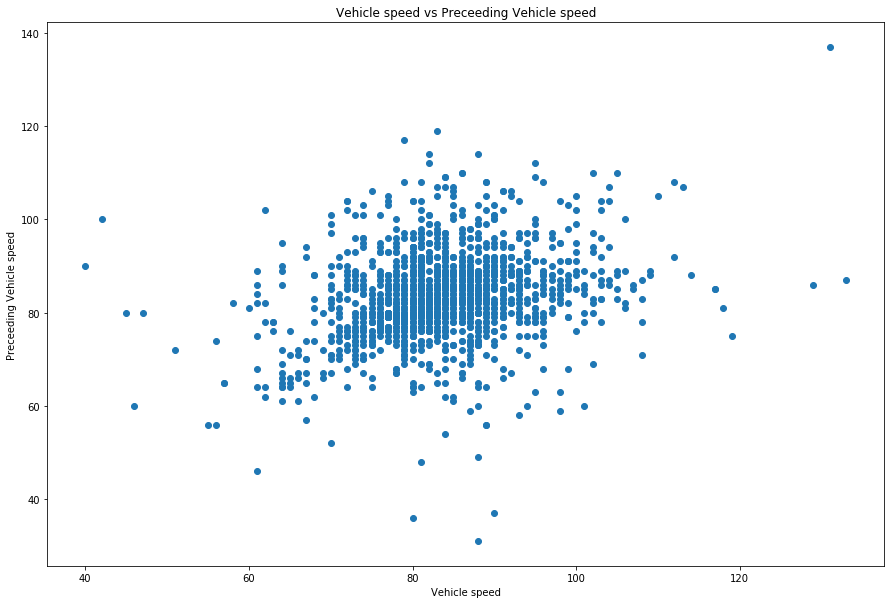

In [67]:
temp = train.sample(frac=0.01)
X = temp.vehicle_speed
Y = temp.pre_vehicle_speed
plt.figure(figsize=(15,10))
plt.xlabel("Vehicle speed")
plt.ylabel("Preceeding Vehicle speed")
plt.title("Vehicle speed vs Preceeding Vehicle speed")
plt.scatter(X,Y)
plt.show()

### Observation : 
The speed of preceeding Vehicle and the current vehicle are almost same

### Relation between Month and road condition

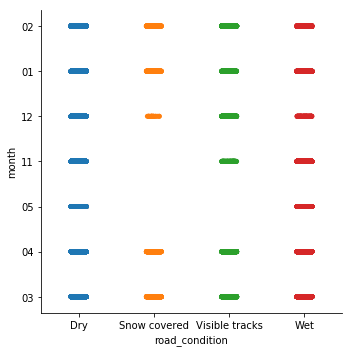

In [68]:
sns.catplot(x="road_condition", y="month",data=train,);

### Observation :
No Snow in the month of May and November

### Trivariate Plots

#### Relation between Driving Style Road Condition and Vehicle Speed

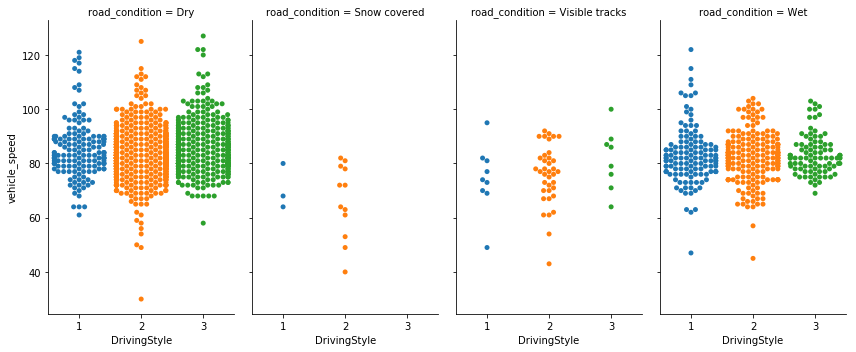

In [69]:
temp = train.sample(frac=0.01)
sns.catplot(x="DrivingStyle", y="vehicle_speed",col="road_condition", aspect=.6,  kind="swarm", data=temp);

### Observation : 
1. Most of the people drive when the road condition is Dry or Wet.
2. Few people drive aggressively inspite of Snow on th road

In [ ]:
train.Num_Axle

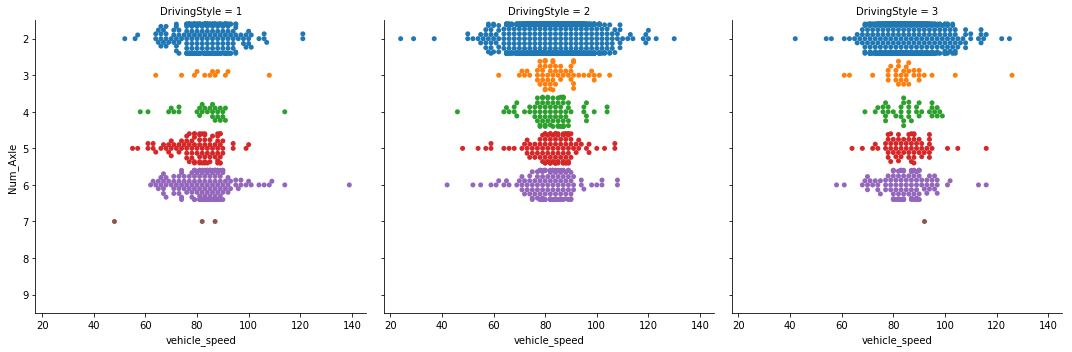

In [73]:
temp = train.sample(frac=0.02)
sns.catplot(x="vehicle_speed", y="Num_Axle",col="DrivingStyle",  kind="swarm", data=temp);

### Observation :
1. The vehicles with 3 Axles drive less aggressively according to data given
2. There are more vehicles with 2 axles